In [1]:
from keras.datasets import cifar10
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

import matplotlib.pyplot as plt

from google.colab import files

import numpy as np

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = cifar10.load_data()

Using TensorFlow backend.


In [0]:
data_images = train_images_original / 255.0
test_images = test_images_original / 255.0

data_labels = train_labels_original
test_labels = test_labels_original

In [0]:
data_size = len(data_images)
val_size = int(data_size * 0.2)

shuffled_i = np.random.permutation(data_size)
data_images = data_images[shuffled_i]
data_labels = data_labels[shuffled_i]

val_images = data_images[:val_size]
train_images = data_images[val_size:]

val_labels = data_labels[:val_size]
train_labels = data_labels[val_size:]

In [5]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flat

In [0]:
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc']
)

In [7]:
epochs = 50
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(val_images, val_labels))

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 16s 393us/step - loss: 1.8612 - acc: 0.3227 - val_loss: 1.6586 - val_acc: 0.4031
Epoch 2/50
40000/40000 [==============================] - 14s 359us/step - loss: 1.5698 - acc: 0.4292 - val_loss: 1.4957 - val_acc: 0.4565
Epoch 3/50
40000/40000 [==============================] - 14s 353us/step - loss: 1.4350 - acc: 0.4831 - val_loss: 1.4476 - val_acc: 0.4811
Epoch 4/50
40000/40000 [==============================] - 14s 353us/step - loss: 1.3451 - acc: 0.5210 - val_loss: 1.3940 - val_acc: 0.5120
Epoch 5/50
40000/40000 [==============================] - 14s 353us/step - loss: 1.2718 - acc: 0.5494 - val_loss: 1.2417 - val_acc: 0.5611
Epoch 6/50
40000/40000 [==============================] - 14s 358us/step - loss: 1.2131 - acc: 0.5711 - val_loss: 1.2263 - val_acc: 0.5702
Epoch 7/50
40000/40000 [==============================] - 14s 357us/

In [0]:
model.save('model_simple.h5')

with open('model_simple.h5', 'r') as f:
  files.download('model_simple.h5')

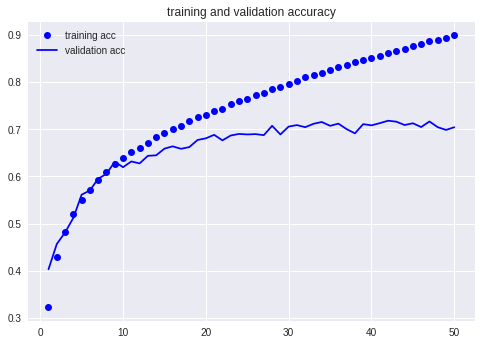

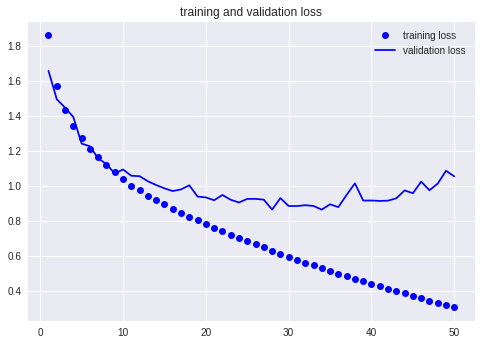

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()